In [1]:
library(ggplot2)
require(graphics)
library(reshape2)
library(grid)
source("http://peterhaschke.com/Code/multiplot.R")
library(locfit)

locfit 1.5-9.1 	 2013-03-22


In [2]:
jul = data.frame(matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_07.dat',
                             na.strings = '-999.999'),ncol=4,byrow=T)) #lat, lon, elev, P
colnames(jul) = c("lat","lon","elev","P")

print(length(jul[,1]))

jul = jul[complete.cases(jul),]

[1] 626


In [3]:
N = length(jul[,1]) # compute length of data frame

In [5]:
# generate models

mods = c("P ~ lat + lon + elev",
        "P ~ lat + lon",
        "P ~ lat + elev",
        "P ~ elev + lon",
        "P ~ lat",
        "P ~ lon",
        "P ~ elev")

params = c(3,2,2,2,1,1,1) # model complexity

mods = matrix(c(T,T,T,T,T,F,T,F,T,F,T,T,T,F,F,F,T,F,F,F,T),7,3, byrow = T)
tmp = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_07.dat',
                             na.strings = '-999.999'),ncol=4,byrow=T)
y = tmp[,4]
X = tmp[,1:3]

In [6]:
gcv_scr = rep(0,1000000) # preallocate
model = gcv_scr
alpha_val = gcv_scr
p_val = gcv_scr

ct = 1
for (i in 1:7){ # loop through the models
    
    for (p in 1:2){ # loop through each polynomial order
        min_alpha = 2*(params[i] * p + 1)/N
        alphas = seq(min_alpha,1,by=0.01) # generate a sequence of alphas
        
        for (alpha in alphas){ # loop through each alpha
            
            mod = locfit(y ~ X[,mods[i,]],alpha = alpha, deg = p, ev=dat(),scale=TRUE)
            
            tmp = gcv(mod)
            
            gcv_scr[ct] = gcv(mod)[4]
            model[ct] = i
            alpha_val[ct] = alpha
            p_val[ct] = p
            
            ct = ct +1 # advance the indexer
        }
    }
}

In [7]:
# trim the output vectors
gcv_scr2 = gcv_scr[gcv_scr>0]
model = model[gcv_scr>0]
alpha_val = alpha_val[gcv_scr>0]
p_val = p_val[gcv_scr>0]

In [8]:
print(min(gcv_scr2))
print("")
print(gcv_scr2[gcv_scr2==min(gcv_scr2)][1:10])
print("")
print(model[gcv_scr2 == min(gcv_scr2)][1:10])
print("")
print(alpha_val[gcv_scr2 == min(gcv_scr2)][1:10])
print("")
print(p_val[gcv_scr2 == min(gcv_scr2)][1:10])

[1] 184.3223
[1] ""
 [1] 184.3223 184.3223 184.3223 184.3223 184.3223 184.3223 184.3223 184.3223
 [9] 184.3223 184.3223
[1] ""
 [1] 1 1 1 1 1 1 1 1 1 1
[1] ""
 [1] 0.01793722 0.02793722 0.03793722 0.04793722 0.05793722 0.06793722
 [7] 0.07793722 0.08793722 0.09793722 0.10793722
[1] ""
 [1] 1 1 1 1 1 1 1 1 1 1


In [8]:
length(gcv_scr2[gcv_scr2==min(gcv_scr2)])

[1] 196

### "Best" model

P ~ lat + lon + elev

alpha = 0.01793722

p = 1

### ANOVA and model diagnostics

In [34]:
mod = locfit(P ~ lat + lon + elev, jul, alpha=0.01793722, deg = 1, ev=rbox())

Warning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating variance

lik         infl         vari          gcv 
-38393.47034     14.95544     13.60987    184.32230

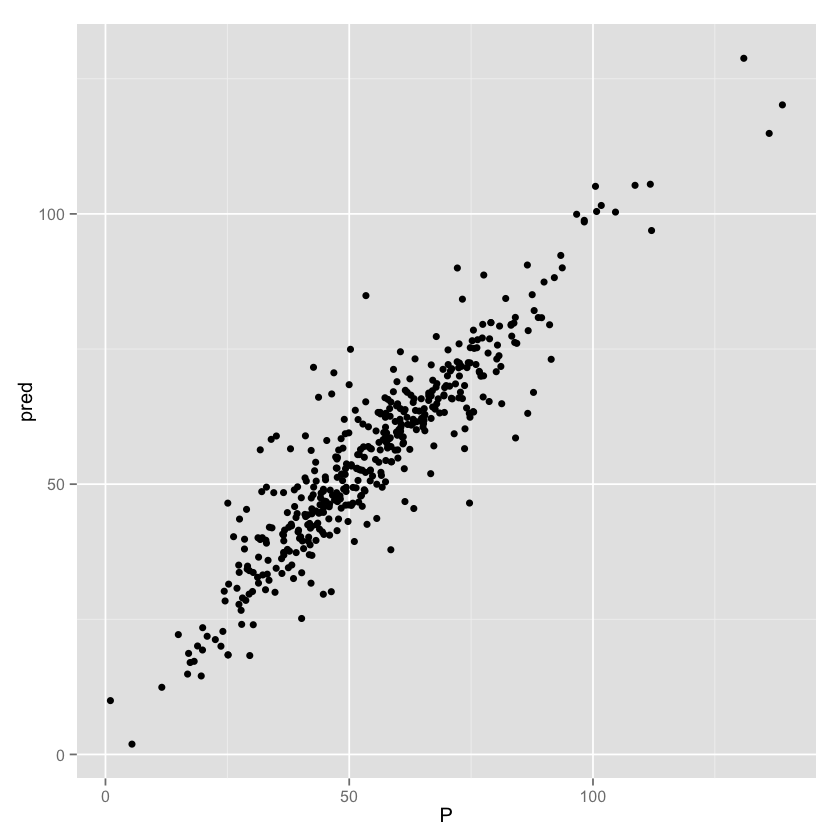

In [36]:
ggplot(jul,aes(x=P,y=pred)) + geom_point()

In [10]:
names(mod)

[1] "eva"     "cell"    "terms"   "nvc"     "box"     "sty"     "deriv"  
 [8] "mi"      "dp"      "trans"   "critval" "vnames"  "yname"   "call"   
[15] "frame"

### Leave one out Cross Validation

In [11]:
c1 = c(1:N) # create a subsetting variable
pred = c(1:N) # create a container for the predicted values
for (i in 1:N){
mod = locfit(P ~ lat + lon + elev,jul,alpha=0.01793722,deg =1,subset=(c1!=i), ev=rbox(), scale=TRUE) # fit a model leaving 1 point out
pred[i] = predict(mod,newdata = jul[i,]) # predict the removed point using the model 
}

Warning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating varianceWarning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating varianceWarning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating varianceWarning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating varianceWarning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating varianceWarning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating varianceWarning message:
In lfproc(x, y, weights = weights, cens = cens, base = base, geth = geth, : Estimated rdf < 1.0; not estimating varianceWarning message:
In lfproc(x, y, weights 

In [12]:
jul$pred_loocv = pred

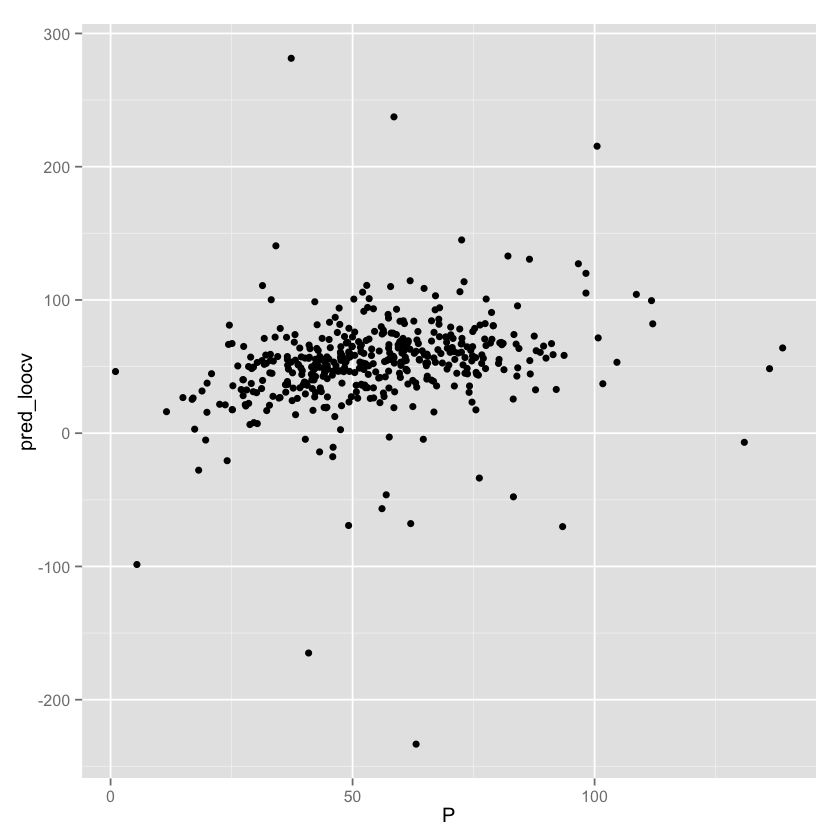

In [13]:
ggplot(jul,aes(x=P,y=pred_loocv)) + geom_point()


### Do January for fun

In [9]:
jan= data.frame(matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_01.dat',
                             na.strings = '-999.999'),ncol=4,byrow=T)) #lat, lon, elev, P
colnames(jan) = c("lat","lon","elev","P")

print(length(jan[,1]))

jan = jan[complete.cases(jan),]

[1] 626


In [10]:
N = length(jul[,1]) # compute length of data frame

In [11]:
# generate models

mods = c("P ~ lat + lon + elev",
        "P ~ lat + lon",
        "P ~ lat + elev",
        "P ~ elev + lon",
        "P ~ lat",
        "P ~ lon",
        "P ~ elev")

params = c(3,2,2,2,1,1,1) # model complexity

mods = matrix(c(T,T,T,T,T,F,T,F,T,F,T,T,T,F,F,F,T,F,F,F,T),7,3, byrow = T)
tmp = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_01.dat',
                             na.strings = '-999.999'),ncol=4,byrow=T)
y = tmp[,4]
X = tmp[,1:3]

In [14]:
gcv_scr = rep(0,1000000) # preallocate
model = gcv_scr
alpha_val = gcv_scr
p_val = gcv_scr

ct = 1
for (i in 1:7){ # loop through the models
    
    for (p in 1:2){ # loop through each polynomial order
        min_alpha = 2*(params[i] * p + 1)/N
        alphas = seq(min_alpha,1,by=0.01) # generate a sequence of alphas
        
        for (alpha in alphas){ # loop through each alpha
            
            mod = locfit(y ~ X[,mods[i,]],alpha = alpha, deg = p, ev=dat(),scale=TRUE)
            
            tmp = gcv(mod)
            
            gcv_scr[ct] = gcv(mod)[4]
            model[ct] = i
            alpha_val[ct] = alpha
            p_val[ct] = p
            
            ct = ct +1 # advance the indexer
        }
    }
}

In [15]:
# trim the output vectors
gcv_scr2 = gcv_scr[gcv_scr>0]
model = model[gcv_scr>0]
alpha_val = alpha_val[gcv_scr>0]
p_val = p_val[gcv_scr>0]

In [16]:
print(min(gcv_scr2))
print("")
print(gcv_scr2[gcv_scr2==min(gcv_scr2)][1:10])
print("")
print(model[gcv_scr2 == min(gcv_scr2)][1:10])
print("")
print(alpha_val[gcv_scr2 == min(gcv_scr2)][1:10])
print("")
print(p_val[gcv_scr2 == min(gcv_scr2)][1:10])

[1] 350.9499
[1] ""
 [1] 350.9499 350.9499 350.9499 350.9499 350.9499 350.9499 350.9499 350.9499
 [9] 350.9499 350.9499
[1] ""
 [1] 1 1 1 1 1 1 1 1 1 1
[1] ""
 [1] 0.01793722 0.02793722 0.03793722 0.04793722 0.05793722 0.06793722
 [7] 0.07793722 0.08793722 0.09793722 0.10793722
[1] ""
 [1] 1 1 1 1 1 1 1 1 1 1


In [29]:
names(mod)

[1] "eva"     "cell"    "terms"   "nvc"     "box"     "sty"     "deriv"  
 [8] "mi"      "dp"      "trans"   "critval" "vnames"  "yname"   "call"   
[15] "frame"

In [30]:
mod$

$sv
integer(0)

$ce
integer(0)

$s
integer(0)

$lo
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0

$hi
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0